In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data.csv')
df.head()

,index,totalCarNumber,numberOfTrips,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,0,450,1027,1.705098,1.361006,2.164053,2.692238
1,1,450,1499,1.727320,1.369163,2.129631,2.613873
2,2,450,1453,1.743381,1.381928,2.174329,2.682936
3,3,450,1453,1.714911,1.377398,2.135770,2.587425
4,4,450,1511,1.735254,1.388179,2.166079,2.671485


In [3]:
df.shape

(288, 7)

In [10]:
traindf = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
traindf = traindf.to_numpy()
traindf_list = np.split(traindf, 18)

In [6]:
testdf = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
testdf = testdf.iloc[::6, :]
testdf.head()

,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,1.705098,1.361006,2.164053,2.692238
6,1.759447,1.392674,2.217610,2.808677
12,1.826229,1.404581,2.346713,3.140082
18,1.612197,1.328077,2.001101,2.414315
24,1.592894,1.323009,1.905886,2.253935


In [33]:
# data_to_plot = df.iloc[::6, :]

# data_to_plot.head()
data_to_plot = df.to_numpy()

In [8]:
def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) > 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = model
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
        plt.plot(silhouette_range[:], silhouette_scores[:])
        plt.xlabel('Number Of Clusers')
        plt.ylabel('Silhouette Score')
#         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
        plt.show()
        plt.close() 
        max_score = max(silhouette_scores)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        return n_clusters_min

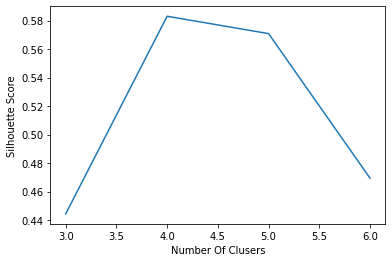

The highest silhouette scores(0.5830455371430493) is for 4 clusers


In [37]:
model = Birch(n_clusters=None, threshold=0.2)

for i in traindf_list:
    model.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model, traindf, 3, 6)

model.set_params(n_clusters = n)
model.partial_fit()
    
labels = model.predict(data_to_plot[:, 3:])

Text(0.5, 0.98, 'Clustering without Average')

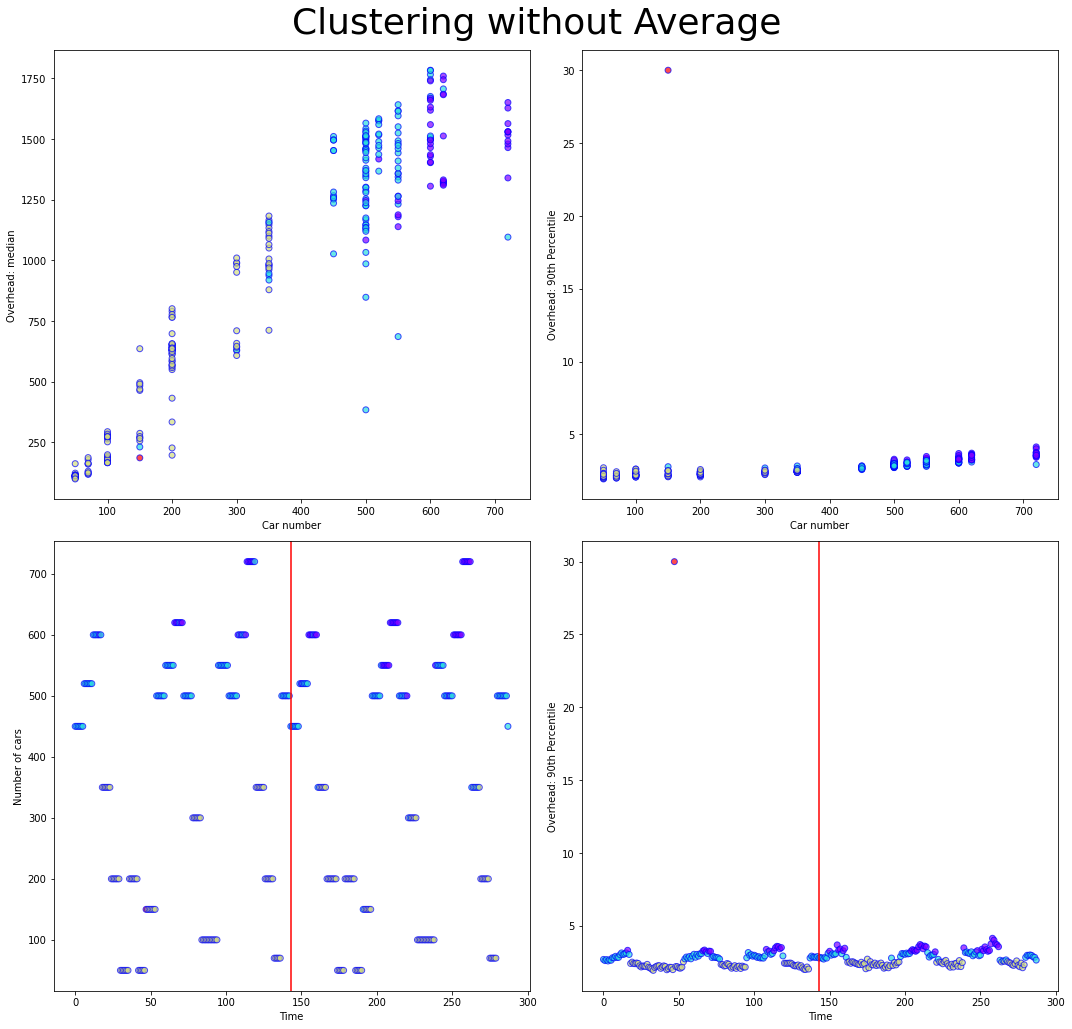

In [38]:
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(data_to_plot[:,1], data_to_plot[:,2], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
axs[0,0].set_ylabel('Overhead: median')
axs[0,0].set_xlabel('Car number')


axs[0,1].scatter(data_to_plot[:,1], data_to_plot[:,6], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[0,1].set_ylabel('Overhead: 90th Percentile')
axs[0,1].set_xlabel('Car number')

axs[1,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[1,0].axvline(x=143, color='r')
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time')

axs[1,1].scatter(data_to_plot[:,0], data_to_plot[:,6], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
axs[1,1].axvline(x=143, color='r')
axs[1,1].set_ylabel('Overhead: 90th Percentile')
axs[1,1].set_xlabel('Time')

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Clustering without Average', fontsize=36)

In [23]:
df

(273, 6)

In [24]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
to_drop = [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,265,266]

# data_split_modified_z.drop(to_drop, inplace=True)

# data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()
indexes = [] 
# print_graphs(data_split_modified_z, 'Before outlier detection')
data_split_modified_z = np.split(data_split_modified_z, 18)

for d in range(len(data_split_modified_z)):
    ind = []
    k = len(data_split_modified_z[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z[d])):
            modified_z_score = 0.6745 * (data_split_modified_z[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z[d] = np.delete(data_split_modified_z[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z[d]))))
    for num in range(len(ind)):
        j = ind[num] + (d*15)
        ind[num] = j
        
    indexes.append(ind)
#     print('\n')
print(indexes)
data_split_modified_z = np.concatenate(data_split_modified_z, axis=0)
# print_graphs(data_split_modified_z, 'After outlier detection')

Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 3
Outliers detected: 0
Outliers detected: 4
Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 1
Outliers detected: 0
[[], [15, 15, 15], [45], [], [], [90, 90], [], [], [], [], [150, 150, 150, 151, 164], [], [180, 181, 182, 183, 180, 182, 183], [], [225, 225], [235], [242], []]


In [27]:
data_split_modified_z_list = np.split(data_split_modified_z, 5)
# data_split_modified_z.shape

/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


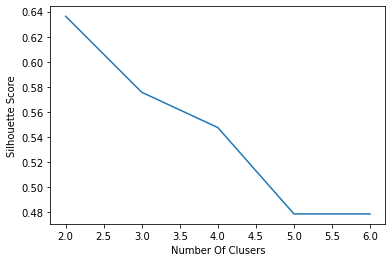

The highest silhouette scores(0.6363092383336096) is for 2 clusers


In [31]:
model_new = Birch(n_clusters=None, threshold=0.2)

for i in data_split_modified_z_list:
    model_new.partial_fit(i[:, 0:-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_new, data_split_modified_z[:, 0:-2], 2, 6)

model_new.set_params(n_clusters = n)
model_new.partial_fit()
    
labels = model_new.predict(data_split_modified_z[:, 0:-2])

Text(0.5, 0.98, 'Clustering without Average')

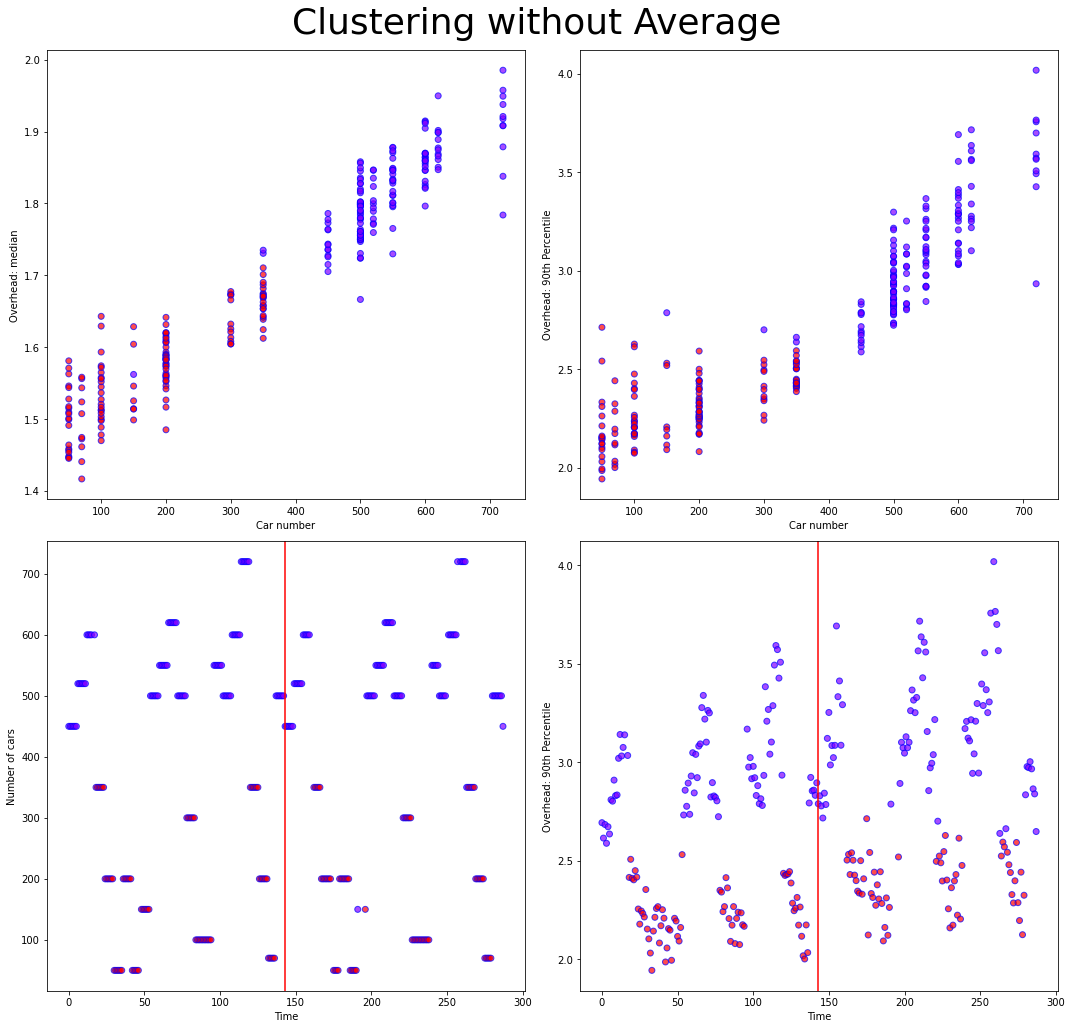

In [32]:
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(data_split_modified_z[:,4], data_split_modified_z[:,0], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
axs[0,0].set_ylabel('Overhead: median')
axs[0,0].set_xlabel('Car number')

axs[0,1].scatter(data_split_modified_z[:,4], data_split_modified_z[:,3], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[0,1].set_ylabel('Overhead: 90th Percentile')
axs[0,1].set_xlabel('Car number')

axs[1,0].scatter(data_split_modified_z[:,5], data_split_modified_z[:,4], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[1,0].axvline(x=143, color='r')
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time')

axs[1,1].scatter(data_split_modified_z[:,5], data_split_modified_z[:,3], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
axs[1,1].axvline(x=143, color='r')
axs[1,1].set_ylabel('Overhead: 90th Percentile')
axs[1,1].set_xlabel('Time')

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Clustering without Average', fontsize=36)